# MILESTONES 2

# 1 - Introduction
- Nama : Anggara Sutisna
- Batch: 016
- Phase: 2
- Dataset: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

## Background
**IMDb** is the world's most popular and authoritative source for movie, TV, and celebrity information. Watch trailers, get showtimes, and buy tickets for upcoming films. Rate and review shows you've seen and track what you want to watch using your Watchlist.
The large number of reviews obtained by IMDb is the reason for the company to carry out an analysis regarding the sentiments given by the audience, so that the company can find out positive or negative responses.<br><br>

### Problem Statement
The company asked a data scientist to do a sentiment analysis of the reviews it obtained based on 50k samples.

1. what is the proportion of positive and negative sentiment?
2. What are the words that appear the most in negative and positive sentiments?
3. What kind of preprocessing techniques can be done for this dataset?
4. Classification whether a review is a negative or positive sentiment

## Objectives
Create a `Classification` model for `sentiment analysis` using the `Artificial Neural Network Algorithm`

# 2 - Import Libraries
The first step in this project is to prepare the libraries that will be used during modeling.

In [ ]:
#main library
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

#Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.layers import TextVectorization, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import re
import string
import ast


#algorithm and evaluation
from tensorflow.keras.layers import Dense, GlobalAveragePooling1D, Input, LSTM, GRU, Dropout, Bidirectional
from tensorflow.keras.models import Model, Sequential
from keras.callbacks import EarlyStopping,ModelCheckpoint
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

#deploy
import joblib
import json
import pickle
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# 3 - Data Loading
The dataset that we have obtained in csv format will be loaded into the datafame with the `read_csv()` function in pandas.

In [ ]:
df = pd.read_csv("IMDB Dataset.csv")

Displays the first 5 data from the dataset that has been entered into the dataframe.

In [ ]:
#view 5 rows
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Next we can display the last 5 data in the dataset

In [ ]:
#view 5 rows
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


Next we will look at the dimensions of the dataset with the `.shape` function

In [ ]:
df.shape

(50000, 2)

There are `50000 rows` and `2 columns` in the dataset, then we can see which columns are available

In [ ]:
df.columns

Index(['review', 'sentiment'], dtype='object')

# 4 - Exploratory Data Analysis (EDA)
In this section we will explore to understand all the data, several processes will be carried out, namely:
- Filtering
- Grouping
- Visualization


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


From the results above, there are 2 columns, namely `review and sentiment` with the data `object` type. Judging from the amount of data, it can be concluded that there is no missing data.

In [ ]:
# look at the first 5 data for positive
df[df['sentiment'] == 'positive'].head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive


At first glance, from the first 5 data, we can see that there is an `html tag (<br>)` in a document, so we will analyze this further

In [ ]:
#look at the first 5 data for negatve
df[df['sentiment'] == 'negative'].head(5)

,review,sentiment
3,Basically there's a family where a little boy ...,negative
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
10,Phil the Alien is one of those quirky films wh...,negative
11,I saw this movie when I was about 12 when it c...,negative


In [ ]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
df.groupby('sentiment').describe()

review                                                            \
           count unique                                                top   
sentiment                                                                    
negative   25000  24698  This show comes up with interesting locations ...   
positive   25000  24884  Loved today's show!!! It was a variety and not...   

                
          freq  
sentiment       
negative     3  
positive     5

**Insight**
- From the statistical, there are reviews with a frequency of 5, this shows that there are 5 times the same review, while sentiment has a unique value of 2 labels with a frequency of 25000 each.
- There are reviews with a frequency of 3 on negative and 5 on positive
- The difference between the total row and the total unique value tends to be different, which is normal because it is possible that there are the same reviews

#### Visualization

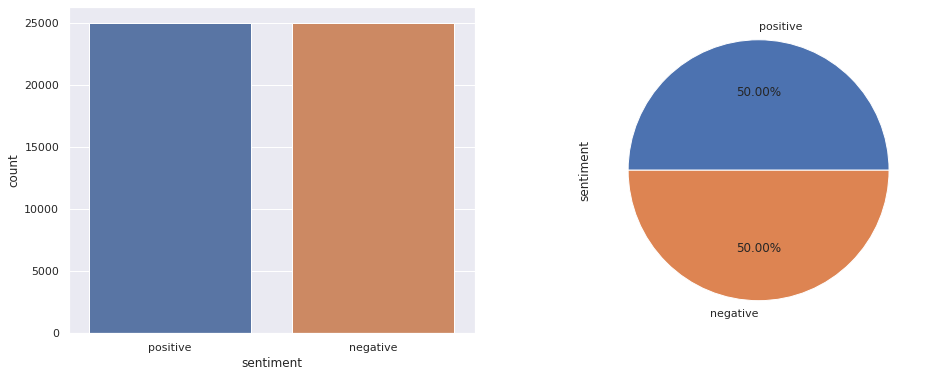

In [ ]:
sns.set(style='darkgrid')
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(data=df, x='sentiment')
plt.subplot(1,2,2)
df['sentiment'].value_counts().plot(kind ='pie', autopct = '%1.2f%%')

**Insight:** 
- Positive and negative sentiment data are balance distributed

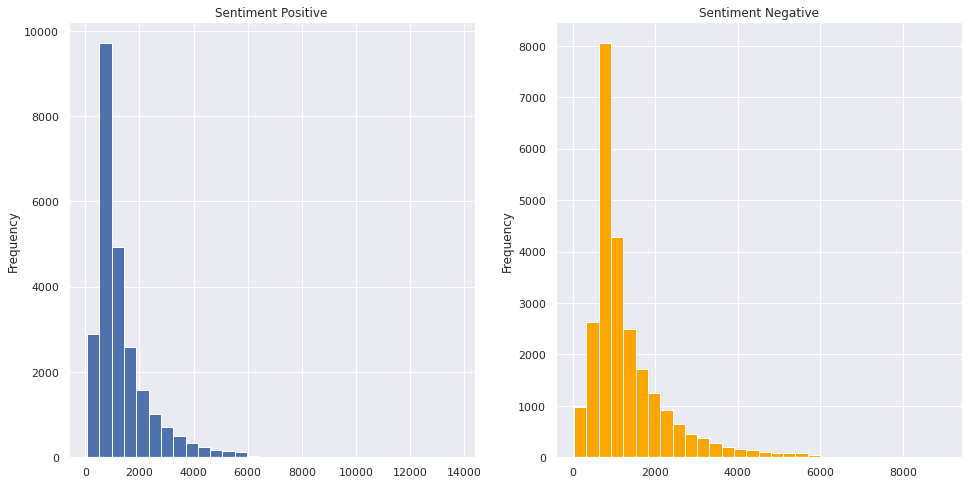

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title("Sentiment Positive")
df[df['sentiment'] == 'positive']['review'].str.len().plot.hist(bins=30)
plt.subplot(1,2,2)
plt.title("Sentiment Negative")
df[df['sentiment'] == 'negative']['review'].str.len().plot.hist(bins=30, color='orange')

**Insight:** 
- `Positive sentiment` tends to have a `longer text` than reviews that have negative sentiment

### Wordcloud

In [ ]:
positive = df[df['sentiment'] == 'positive']
negative = df[df['sentiment'] == 'negative']

sw = set(STOPWORDS)

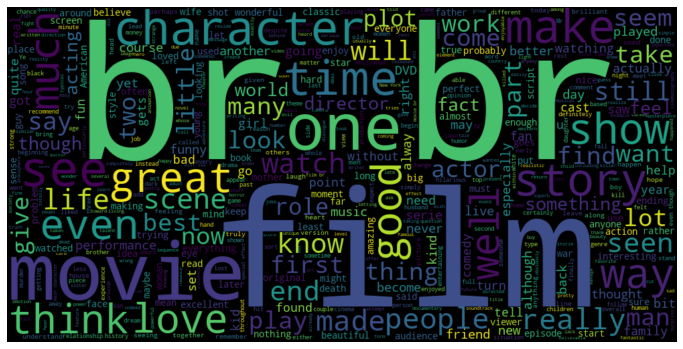

In [ ]:
sent_positive = " ".join(i for i in positive.review)
wordcloud_positive = WordCloud(stopwords = sw, width=1000, height=500, max_words=500, min_font_size=5).generate(sent_positive)
plt.figure( figsize=(12,12))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.show()

**Insight:**
- HTML tags (`<br>`) appear more frequently
- The words film, movie, one, time etc. seem to have quite a lot of frequency

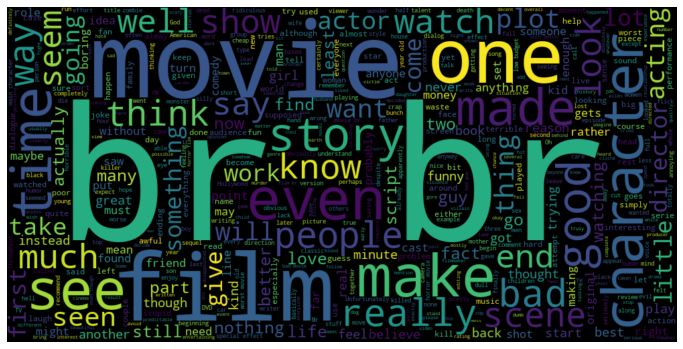

In [ ]:
sent_negative = " ".join(i for i in negative.review)
wordcloud_negative = WordCloud(stopwords = sw, width=1000, height=500, max_words=500, min_font_size=5).generate(sent_negative)
plt.figure( figsize=(12,12))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.show()

**Insight:**
- The same as the positive sentiment above, HTML tags (`<br>`) appear more frequently
- The words film, movie, one, time etc. seem to have quite a lot of frequency

In [ ]:
# use english
cv = CountVectorizer(stop_words = 'english')

Text(0.5, 1.0, 'Most Frequently Occuring Words Top 10')

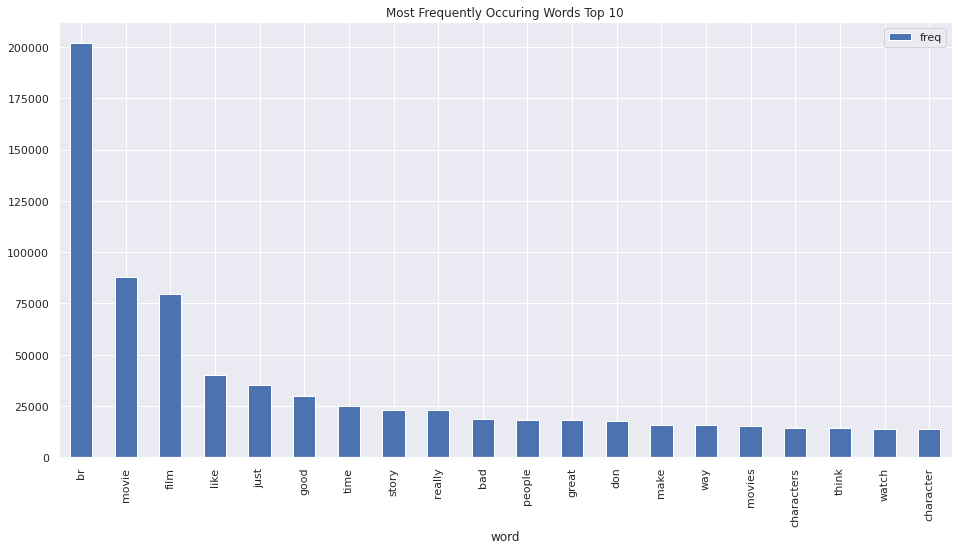

In [ ]:
words = cv.fit_transform(df.review)

words_sum = words.sum(axis=0)

words_freq = [(word, words_sum[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(20).plot.bar(x='word', y='freq', figsize=(16,8))
plt.title("Most Frequently Occuring Words Top 10")

Text(0.5, 1.0, 'Most Frequently Occuring Words Top 10')

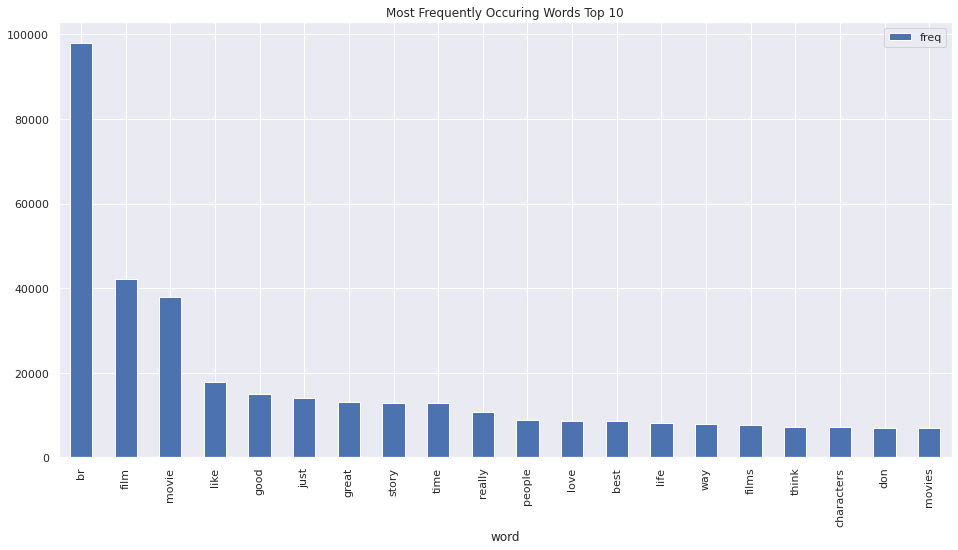

In [ ]:
words_positive = cv.fit_transform(positive.review)

words_sum = words_positive.sum(axis=0)

words_freq = [(word, words_sum[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(20).plot.bar(x='word', y='freq', figsize=(16,8))
plt.title("Most Frequently Occuring Words Top 10")

Text(0.5, 1.0, 'Most Frequently Occuring Words Top 10')

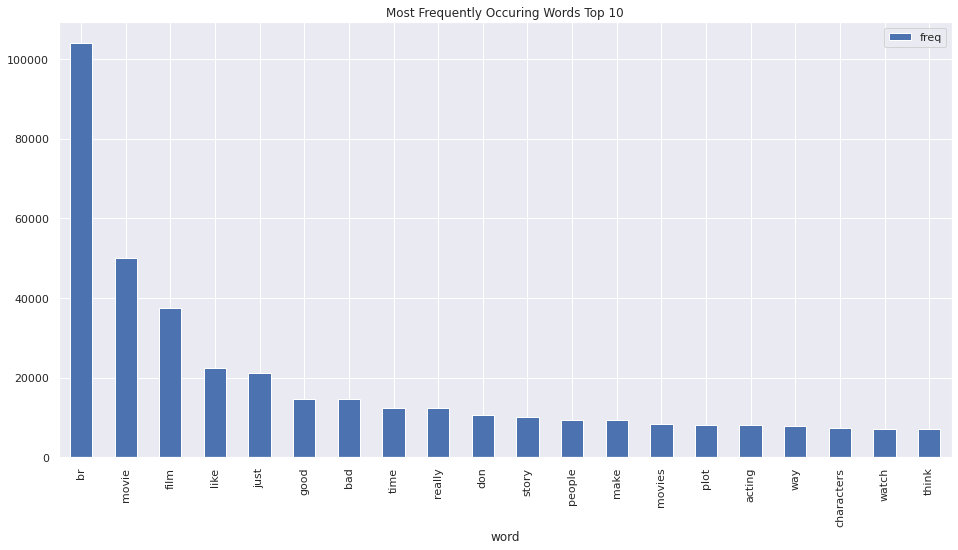

In [ ]:
words_negative = cv.fit_transform(negative.review)

words_sum = words_negative.sum(axis=0)

words_freq = [(word, words_sum[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(20).plot.bar(x='word', y='freq', figsize=(16,8))
plt.title("Most Frequently Occuring Words Top 10")

**Insight** : 
1. HTML tags are present throughout the document
2. Movie, Film, Like, Just are the words that appear most frequently in reviews
3. There are the words movie and movies which maybe have the same meaning. we will do this normalization

# 5 - Data Preprocessing (Feature Engineering)
In this section what will be done is:
- Text Preprocessing
- Tokenization
- Embedding

## Preprocessing Single Document

In [ ]:
example = df['review'].iloc[0]
example

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

As we saw earlier, one of the review examples above contains a lot of `html tags and punctuation`, in this example we will do text cleaning with the example text above.

### 5.1 - Remove HTML Tag

In [ ]:
# remove html tag
example = BeautifulSoup(example, "html.parser").get_text()
example

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

By using the BeautifulSoup library, every `html tag` will be `removed` in the document and only the `text elements will be returned`

### 5.2 - Replace the chatword into a formal form
Chat word is a word often used in a non-formal form, we will convert this into a formal form using the preprocessing reference belowreference below<br>
chatwords ref : https://www.kaggle.com/code/niteshk97/nlp-text-preprocessing?scriptVersionId=112984470&cellId=24

**This is done so that the model is still able to understand complete words and sentences**

In [ ]:
#open chatwords.txt
with open('chatwords.txt') as f:
    data = f.read()

chatwords =  ast.literal_eval(data)
chatwords

{'AFAIK': 'As Far As I Know',
 'AFK': 'Away From Keyboard',
 'ASAP': 'As Soon As Possible',
 'ATK': 'At The Keyboard',
 'ATM': 'At The Moment',
 'A3': 'Anytime, Anywhere, Anyplace',
 'BAK': 'Back At Keyboard',
 'BBL': 'Be Back Later',
 'BBS': 'Be Back Soon',
 'BFN': 'Bye For Now',
 'B4N': 'Bye For Now',
 'BRB': 'Be Right Back',
 'BRT': 'Be Right There',
 'BTW': 'By The Way',
 'B4': 'Before',
 'CU': 'See You',
 'CUL8R': 'See You Later',
 'CYA': 'See You',
 'FAQ': 'Frequently Asked Questions',
 'FC': 'Fingers Crossed',
 'FWIW': 'For What Its Worth',
 'FYI': 'For Your Information',
 'GAL': 'Get A Life',
 'GG': 'Good Game',
 'GN': 'Good Night',
 'GMTA': 'Great Minds Think Alike',
 'GR8': 'Great!',
 'G9': 'Genius',
 'IC': 'I See',
 'ICQ': 'I Seek you (also a chat program)',
 'ILU': 'ILU: I Love You',
 'IMHO': 'In My Honest/Humble Opinion',
 'IMO': 'In My Opinion',
 'IOW': 'In Other Words',
 'IRL': 'In Real Life',
 'KISS': 'Keep It Simple, Stupid',
 'LDR': 'Long Distance Relationship',
 'LMA

In [ ]:
temp=[]
for chat in example.split():
   if chat.upper() in chatwords:
      temp.append(chatwords[chat.upper()])
   else:
      temp.append(chat)

example = " ".join(temp)
example

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

In the example above there are no chatwords, so there's no difference. but this must still be implemented because the number of documents in this dataset is 50k

### 5.3 - Lowercase

In [ ]:
# lowercase
example = example.lower()
example

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows wo

In machine learning, uppercase and lowercase letters will have different meanings where ML will basically consider uppercase letters more important, so we do lowercase like the example above

### 5.4 - Replace Abbreviation of Word

In English, there are several words that are often abbreviated as pronoun abbreviations. In this preprocessing, replacing abbreviation will be carried out based on the reference source below<br>
ref: https://www.kaggle.com/code/life2short/data-processing-replace-abbreviation-of-word/notebook

**this is done because basically the use of the English language uses a lot of pronoun abbreviations**

In [ ]:
# open abbreviation.txt
with open('abbreviation.txt') as a:
    abb = a.read()

abbreviation =  ast.literal_eval(abb)
abbreviation

{"what's": 'what is',
 "what're": 'what are',
 "who's": 'who is',
 "who're": 'who are',
 "where's": 'where is',
 "where're": 'where are',
 "when's": 'when is',
 "when're": 'when are',
 "how's": 'how is',
 "how're": 'how are',
 "i'm": 'i am',
 "we're": 'we are',
 "you're": 'you are',
 "they're": 'they are',
 "it's": 'it is',
 "he's": 'he is',
 "she's": 'she is',
 "that's": 'that is',
 "there's": 'there is',
 "there're": 'there are',
 "i've": 'i have',
 "we've": 'we have',
 "you've": 'you have',
 "they've": 'they have',
 "who've": 'who have',
 "would've": 'would have',
 "not've": 'not have',
 "i'll": 'i will',
 "we'll": 'we will',
 "you'll": 'you will',
 "he'll": 'he will',
 "she'll": 'she will',
 "it'll": 'it will',
 "they'll": 'they will',
 "isn't": 'is not',
 "wasn't": 'was not',
 "aren't": 'are not',
 "weren't": 'were not',
 "can't": 'can not',
 "couldn't": 'could not',
 "don't": 'do not',
 "didn't": 'did not',
 "shouldn't": 'should not',
 "wouldn't": 'would not',
 "doesn't": 'does n

In [ ]:
temp2=[]
for abbr in example.split():
   if abbr in abbreviation:
      temp2.append(abbreviation[abbr])
   else:
      temp2.append(abbr)

example = " ".join(temp2)
example

"one of the other reviewers has mentioned that after watching just 1 oz episode you will be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows 

We can see that the example text above has several differences, such as:
- you'll - you will
- who'll - who will

by returning it to formal form, it will be easier for the system to do preprocessing at the stop words stage

### 5.5 - Remove Punctiation

In [ ]:
# remove punctuation
example = re.sub("[^a-zA-Z]",' ', example)
example = re.sub('\[[^]]*\]', ' ', example)
example

'one of the other reviewers has mentioned that after watching just   oz episode you will be hooked  they are right  as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence  which set in right from the word go  trust me  this is not a show for the faint hearted or timid  this show pulls no punches with regards to drugs  sex or violence  its is hardcore  in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary  it focuses mainly on emerald city  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  em city is home to many  aryans  muslims  gangstas  latinos  christians  italians  irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows 

In [ ]:
# remove newline
example = re.sub(r"\\n", " ", example)
# remove whitespace
example = example.strip()
# show teks without punctuation
example = ' '.join(example.split())
example

'one of the other reviewers has mentioned that after watching just oz episode you will be hooked they are right as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to many aryans muslims gangstas latinos christians italians irish and more so scuffles death stares dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows would not dare forget prett

In NLP removing punctuation is a must for the model to work properly, The punctuation removal process will help to treat each text equally. For example, the word data and data! are treated equally after the process of removal of punctuations.
- from the results of the text above we can see some differences such as quotation marks, whitespace and other punctuation marks have been removed

### 5.6 - Remove Stopwords
The reason why stop words are critical to many applications is that, if we remove the words that are very commonly used in a given language, we can focus on the important words instead. For Example there is a sentece: `one of the other reviewers has mentioned` From this sentence there are several words that appear frequently, such as: `of, the, other, has` 

- then stopwords are used to remove words like that. where words that have a very frequent frequency will be meaningless for machine learning

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
swords = stopwords.words('english')

In [ ]:
tokens = word_tokenize(example)
stop_words = ' '.join([word for word in tokens if word not in swords])

print('Document     (Size :', len(example.split()),') : ', example)
print('Tokens       (Size :', len(tokens),') : ', tokens)
print('Clean Tokens (Size :', len(stop_words.split()),') : ', stop_words)

Document     (Size : 313 ) :  one of the other reviewers has mentioned that after watching just oz episode you will be hooked they are right as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to many aryans muslims gangstas latinos christians italians irish and more so scuffles death stares dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other show

Out of a total of `313 words`, using stopwords only `164 remain` which we can consider important for the model

### 5.7 - Continuing Normalization (Stemm & Lemma)

In [ ]:
lem = WordNetLemmatizer()
example_lem = [lem.lemmatize(word) for word in stop_words.split()]

ps = PorterStemmer()
example_ps = [ps.stem(word) for word in stop_words.split()]

stem = pd.DataFrame({'Base':stop_words.split(),'Lemmatizer':example_lem,'PorterStemmer':example_ps})
stem.head(10)

,Base,Lemmatizer,PorterStemmer
0,one,one,one
1,reviewers,reviewer,review
2,mentioned,mentioned,mention
3,watching,watching,watch
4,oz,oz,oz
5,episode,episode,episod
6,hooked,hooked,hook
7,right,right,right
8,exactly,exactly,exactli
9,happened,happened,happen


**Note:**
- In PorterStemmer, normalization tends to change a word to an initial form that is less precise, such as `exactli and episode`
- Lemmatization is preferred for context analysis, whereas stemming is recommended when the context is not important.
- Based on the case we are dealing with is in sentiment analysis, then every word context will be important **So we choose the lemma for this case**

## Preprocessing All Document
After testing one of the documents, preprocessing will now be carried out for the entire review document

In [ ]:
def clean_html(text):
    # remove html tag
    data = BeautifulSoup(text, "html.parser").get_text()
    return data

def check_chatwords(text):
    temp=[]
    for chat in text.split():
        if chat.upper() in chatwords:
            temp.append(chatwords[chat.upper()])
        else:
            temp.append(chat)
    return " ".join(temp)

def lower(text):
    # lowercase
    data = text.lower()
    return data

def check_abbr(text):
    temp2=[]
    for abbr in text.split():
      if abbr in abbreviation:
          temp2.append(abbreviation[abbr])
      else:
          temp2.append(abbr)

    return " ".join(temp2)

def check_punctuation(text):
    data = re.sub("[^a-zA-Z]",' ', text)
    data = re.sub('\[[^]]*\]', ' ', data)
    data = re.sub(r"\\n", " ", data)
    data = re.sub(r"http\S+", " ", data)
    data = re.sub(r"www.\S+", " ", data)
    data = re.sub("[^A-Za-z\s']", " ", data)
    data = data.strip()
    data = ' '.join(data.split())
    return data

def token_swords_lemma(text):
    tokens = word_tokenize(text)
    stop_words = ' '.join([word for word in tokens if word not in swords])
    data = [lem.lemmatize(word) for word in stop_words.split()]
    data = ' '.join(data)
    return data

From the function that was created above, we can apply it directly by using the apply(lambda) function

In [ ]:
df['review'] = df['review'].apply(lambda i: clean_html(i))
df['review'] = df['review'].apply(lambda j: check_chatwords(j))
df['review'] = df['review'].apply(lambda k: lower(k))
df['review'] = df['review'].apply(lambda l: check_abbr(l))
df['review'] = df['review'].apply(lambda m: check_punctuation(m))
df['review'] = df['review'].apply(lambda n: token_swords_lemma(n))

In [ ]:
# shows 5 clean data
df['review'].head()

0    one reviewer mentioned watching oz episode hoo...
1    wonderful little production filming technique ...
2    thought wonderful way spend time hot summer we...
3    basically family little boy jake think zombie ...
4    petter mattei love time money visually stunnin...
Name: review, dtype: object

In [ ]:
# shows one of the documents that has been preprocessed
df['review'].iloc[100]

'short film inspired soon full length feature spatula madness hilarious piece contends similar cartoon yielding multiple writer short film star edward spatula fired job join fight evil spoon premise allows funny content near beginning barely present remainder feature film minute running time absorbed odd ball comedy small musical number unfortunately much else lie plot set really time show surely follows plot better many high budget hollywood film film worth watching least time take expect deep story'

The entire dataset for review variables has been preprocessed, then we can do tokenization and embedding

## Convert Target

In [ ]:
# check unique value
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [ ]:
# replace the sentiment label with number
df['label'] = df['sentiment'].replace({'negative' : 0, 'positive' : 1})
df.head(5)

,review,sentiment,label
0,one reviewer mentioned watching oz episode hoo...,positive,1
1,wonderful little production filming technique ...,positive,1
2,thought wonderful way spend time hot summer we...,positive,1
3,basically family little boy jake think zombie ...,negative,0
4,petter mattei love time money visually stunnin...,positive,1


In [ ]:
df['label'].value_counts()

1    25000
0    25000
Name: label, dtype: int64

We have managed to change the sentiment class above where the value is `0 for negative` and `1 for positive`

## Splitting Data

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(df.review, df.label, test_size=0.15, random_state=23)
print('X_train :', X_train_val.shape)
print('X_test  :', X_test.shape)

X_train : (42500,)
X_test  : (7500,)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=23)

print('X_train :', X_train.shape)
print('X_test  :', X_test.shape)
print('X_val   :', X_val.shape)

X_train : (29750,)
X_test  : (7500,)
X_val   : (12750,)


The data that we have separated between features and targets, then we will split it into `train, validation and test` using the `train_test_split` function with the parameter `test_size=0.15 (train 85%, test=15%)` and random state 23.
 - Train 60%
 - Test 15%
 - Validation 25%

## Missing Value

In [ ]:
X_train.isna().sum()

0

In [ ]:
X_test.isna().sum()

0

In [ ]:
X_val.isna().sum()

0

From checking above, no missing value is found, so we can proceed to the next process

## CountVectorizer

In [ ]:
Vectorize   = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_train_vec

<29750x73059 sparse matrix of type '<class 'numpy.int64'>'
	with 2814545 stored elements in Compressed Sparse Row format>

In [ ]:
max_vocab     = len(Vectorize.vocabulary_.keys())
maxlen        = max([len(i.split(" ")) for i in X_train])

print("Num of Vocab : ", max_vocab)
print("Max Features : ", maxlen)

Num of Vocab :  73059
Max Features :  1417


there are `2.173.505.250 (29750x73059)` value from the corpus but only `2.814.545` tokens that are non-zero value

## Tokenization & Word Embedding (Deep Learning)

In [ ]:
#vectorization
text_vectorization = TextVectorization(max_tokens=max_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=maxlen,
                                       input_shape=(1,) 
                                       )

text_vectorization.adapt(X_train)

**Note:**
- Standarize using `lower_and_strip_punctuation` to anticipate datasets
- The output is an integer number
- input_shape 1 to use the sequential model

In [ ]:
# Embedding
embedding = Embedding(input_dim=max_vocab, 
                      output_dim=128, 
                      input_length=maxlen, 
                      embeddings_initializer="uniform", 
                      mask_zero=True)

**Note:** 
- The neuron translates these inputs into a single output, which can then be picked up as input for another layer of neurons later on. `128 neurons` are used in the layer, this number was chosen because the dataset is quite large.
- `mask_zero = True` because use masking to handle the variable sequence lengths

# 6 - Model Definition


### 6.1 - Basic Model

In [ ]:
model = Sequential()
model.add(text_vectorization)
model.add(embedding)
model.add(GlobalAveragePooling1D())
model.add(Dense(32,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 1417)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 1417, 128)         9351552   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9,355,713
Trainable params: 9,355,713
Non-

**Architectural Explanation**<br>
in this basic model we want to do an initial check for the model.
- There is 1 input layer that has done text **vectorization and embeddin**g.
- there is **1 hidden** layer which is given in a dense of 32 neurons which is a simple layer of neurons in which each neuron receives input from all the neurons of previous layer
- the activation function using **sigmoid** because the output is binary
- The total number of parameters is shown as total params with 9.355.713, In this model, all the layers are trainable.
- **binary crossentropy** is used for binary output types, while metric is accuracy
- **Accuracy** is useful when all classes are of equal importance. It is calculated as the ratio between the number of correct predictions to the total number of predictions. In binary classification each input sample is assigned to one of two classes, which we will classify to find out if the review has **positive or negative sentiment**

### 6.2 - LSTM

In [ ]:
model2 = Sequential()
model2.add(text_vectorization)
model2.add(embedding)
model2.add(LSTM(32))
model2.add(Dropout(0.1))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 1417)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 1417, 128)         9351552   
                                                                 
 lstm (LSTM)                 (None, 32)                20608     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9,372,193
Trainable params: 9,372,193
Non-trainable params: 0
____________________________________________

**Architectural LSTM Explanation**<br>
The difference between this model and basic is:
- The unit layer used is **LSTM**
- LSTM has three gates (input, output and forget gate) which makes the computation heavier than dense layers. - **LSTM is good for Text** and especially good for very **large data**
- In this architecture the hidden layer used is 1 with 32 neurons in LSTM, `dropouts are added (0.1)` here because we know that in the basic model the results tend to be `overfitting`

In [ ]:
model3 = Sequential()
model3.add(text_vectorization)
model3.add(embedding)
model3.add(Bidirectional(LSTM(64, return_sequences=True)))
model3.add(LSTM(32))
model3.add(Dropout(0.3))
model3.add(Dense(1, activation='sigmoid'))
model3.summary()

model3.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 1417)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 1417, 128)         9351552   
                                                                 
 bidirectional_1 (Bidirectio  (None, 1417, 128)        98816     
 nal)                                                            
                                                                 
 lstm_4 (LSTM)               (None, 32)                20608     
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

**Architectural LSTM Improvement**<br>
- From the previous LSTM architecture it is known that the results still tend to be **overfitting**. Then an experiment was carried out using Bidirectional
- **In Bidirectional LSTM (BiLSTM)** the input flows in both directions, and it’s capable of utilizing information from both sides. It’s also a powerful tool for modeling the sequential dependencies between words and phrases in both directions of the sequence. In summary, BiLSTM adds one more LSTM layer, which reverses the direction of information flow. 
- To overcome **overfitting**, in this model there are `2 hidden layers and the addition of dropouts (0.3)`
- The addition of the number of layers (2) and neurons (64 & 32) is intended so that the model has better performance and can overcome overfitting


Ref : https://www.baeldung.com/cs/bidirectional-vs-unidirectional-lstm

### 6.3 - GRU

In [ ]:
model4 = Sequential()
model4.add(text_vectorization)
model4.add(embedding)
model4.add(GRU(64, return_sequences=True))
model4.add(GRU(32))
model4.add(Dense(1, activation='sigmoid'))
model4.summary()

model4.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 1417)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 1417, 128)         9351552   
                                                                 
 gru_2 (GRU)                 (None, 1417, 64)          37248     
                                                                 
 gru_3 (GRU)                 (None, 32)                9408      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9,398,241
Trainable params: 9,398,241
Non-trainable params: 0
____________________________________________

**Architectural GRU Improvement**<br>
- **GRU** has two gates (reset and update gate). GRU use less training parameters and therefore use less memory, execute faster and train faster than LSTM's whereas LSTM is more accurate on dataset using longer sequence.
- In this architecture, 2 GRU hidden layers with 64 and 32 neurons

## Params

In [ ]:
earlystop = EarlyStopping(monitor='val_accuracy', 
                          patience=2
                          )

earlystop is used for the model to stop when it finds its best epoch

# 7 - Model Training

## 7.1- Basic Model

In [ ]:
%%time
model_ann_base = model.fit(X_train, y_train, epochs=20, callbacks=earlystop, validation_data=(X_val, y_val))

Epoch 1/20
930/930 [==============================] - 12s 12ms/step - loss: 0.3282 - accuracy: 0.8674 - val_loss: 0.2647 - val_accuracy: 0.8949
Epoch 2/20
930/930 [==============================] - 10s 11ms/step - loss: 0.1453 - accuracy: 0.9502 - val_loss: 0.2969 - val_accuracy: 0.8878
Epoch 3/20
930/930 [==============================] - 10s 11ms/step - loss: 0.0727 - accuracy: 0.9777 - val_loss: 0.3760 - val_accuracy: 0.8760
CPU times: user 35.1 s, sys: 2.76 s, total: 37.8 s
Wall time: 33.2 s


## 7.2 - LSTM

In [ ]:
%%time
model_ann1 = model2.fit(X_train, y_train, epochs=20, callbacks=earlystop, validation_data=(X_val, y_val))

Epoch 1/20
930/930 [==============================] - 35s 33ms/step - loss: 0.1055 - accuracy: 0.9680 - val_loss: 0.4590 - val_accuracy: 0.8574
Epoch 2/20
930/930 [==============================] - 28s 30ms/step - loss: 0.0469 - accuracy: 0.9858 - val_loss: 0.4927 - val_accuracy: 0.8705
Epoch 3/20
930/930 [==============================] - 39s 42ms/step - loss: 0.0347 - accuracy: 0.9898 - val_loss: 0.5503 - val_accuracy: 0.8657
Epoch 4/20
930/930 [==============================] - 28s 31ms/step - loss: 0.0211 - accuracy: 0.9937 - val_loss: 0.5245 - val_accuracy: 0.8624
CPU times: user 2min 16s, sys: 6.75 s, total: 2min 23s
Wall time: 2min 20s


In [ ]:
%%time
model_ann2 = model3.fit(X_train, y_train, epochs=20, callbacks=earlystop, validation_data=(X_val, y_val))

Epoch 1/20
930/930 [==============================] - 95s 87ms/step - loss: 2.4286 - accuracy: 0.8133 - val_loss: 0.5418 - val_accuracy: 0.8173
Epoch 2/20
930/930 [==============================] - 78s 84ms/step - loss: 2.3953 - accuracy: 0.8245 - val_loss: 0.6070 - val_accuracy: 0.8323
Epoch 3/20
930/930 [==============================] - 78s 84ms/step - loss: 2.3736 - accuracy: 0.8366 - val_loss: 0.5001 - val_accuracy: 0.8490
Epoch 4/20
930/930 [==============================] - 77s 82ms/step - loss: 2.3468 - accuracy: 0.8375 - val_loss: 0.5320 - val_accuracy: 0.8048
Epoch 5/20
930/930 [==============================] - 77s 82ms/step - loss: 2.3615 - accuracy: 0.8400 - val_loss: 0.5762 - val_accuracy: 0.8359
CPU times: user 7min 23s, sys: 17.3 s, total: 7min 41s
Wall time: 6min 44s


## 7.3 - GRU

In [ ]:
%%time
model_ann3 = model4.fit(X_train, y_train, epochs=20, callbacks=earlystop, validation_data=(X_val, y_val))

Epoch 1/20
930/930 [==============================] - 57s 54ms/step - loss: 0.0700 - accuracy: 0.9738 - val_loss: 0.6178 - val_accuracy: 0.8482
Epoch 2/20
930/930 [==============================] - 48s 51ms/step - loss: 0.0162 - accuracy: 0.9953 - val_loss: 0.7374 - val_accuracy: 0.8443
Epoch 3/20
930/930 [==============================] - 47s 51ms/step - loss: 0.0072 - accuracy: 0.9976 - val_loss: 0.7694 - val_accuracy: 0.8540
Epoch 4/20
930/930 [==============================] - 47s 51ms/step - loss: 0.0108 - accuracy: 0.9966 - val_loss: 0.8131 - val_accuracy: 0.8403
Epoch 5/20
930/930 [==============================] - 48s 52ms/step - loss: 0.0073 - accuracy: 0.9976 - val_loss: 0.7259 - val_accuracy: 0.8601
Epoch 6/20
930/930 [==============================] - 47s 51ms/step - loss: 0.0054 - accuracy: 0.9982 - val_loss: 0.8142 - val_accuracy: 0.8574
Epoch 7/20
930/930 [==============================] - 47s 51ms/step - loss: 0.0033 - accuracy: 0.9991 - val_loss: 0.9147 - val_accuracy:

**Analysis**<br>
- Basic Model has the highest performance but still tends to overfitting
- In the first LSTM, the resulting model tends to be overfitting too but after adding a bidirectional layer, number of neuron and a dropout of 0.3, the results tend to be good where the train and test accuracy is (0.84-0.83)
- In GRU, the results obtained are still not optimal and there is overvitting.
- Next, we will analyze it in the evaluation model

# 8 - Model Evaluation
In this evaluation the **F1 score** was chosen because we need an assessment of precision and recall. In this case, the two results, both negative and positive, do not have such a big impact because what we want to know is whether the review has positive or negative sentiment

## 8.1- Basic Model

In [ ]:
history_basic_df = pd.DataFrame(model_ann_base.history)

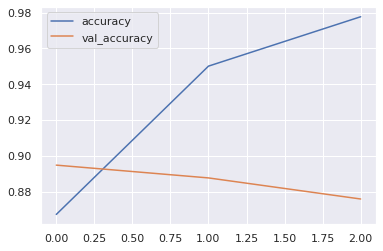

In [ ]:
history_basic_df[['accuracy', 'val_accuracy']].plot()

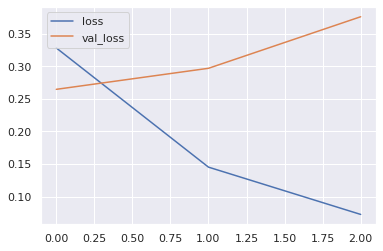

In [ ]:
history_basic_df[['loss', 'val_loss']].plot()

In [ ]:
y_pred_base = model.predict(X_test)
y_pred_base = np.where(y_pred_base >=0.5, 1, 0)
print(classification_report(y_test, y_pred_base))

235/235 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.98      0.41      0.58      3791
           1       0.62      0.99      0.76      3709

    accuracy                           0.70      7500
   macro avg       0.80      0.70      0.67      7500
weighted avg       0.80      0.70      0.67      7500



Text(66.5, 0.5, 'Truth')

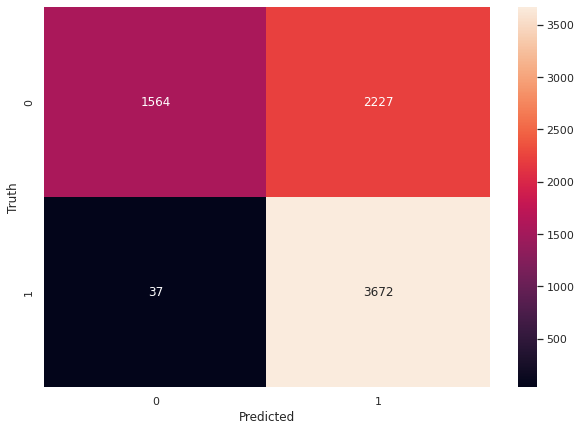

In [ ]:
cm_base = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_base)
plt.figure(figsize = (10,7))
sns.heatmap(cm_base, annot=True,fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

**Evaluation:**
- This model produces an overfitting train where accuracy and loss lead to the opposite
- **The F1 score** obtained is 58 for the 0 (negative) label and total accuracy is 70
- From the results of the classification report and confusiona matrix, the model tends to be wrong in predicting negative sentiment (where the model will predict it as positive sentiment)
- **This is because the sentence patterns between positive and negative reviews have many words in common**

## 8.2 - LSTM

In [ ]:
history_lstm1_df = pd.DataFrame(model_ann1.history)

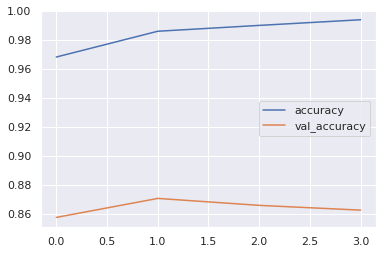

In [ ]:
history_lstm1_df[['accuracy', 'val_accuracy']].plot()

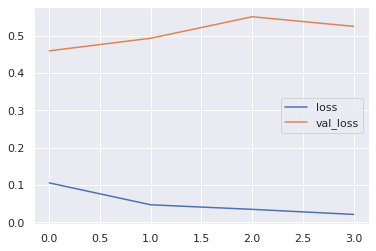

In [ ]:
history_lstm1_df[['loss', 'val_loss']].plot()

In [ ]:
y_pred_lstm1 = model2.predict(X_test)
y_pred_lstm1 = np.where(y_pred_lstm1 >=0.5, 1, 0)
print(classification_report(y_test, y_pred_lstm1))

235/235 [==============================] - 6s 11ms/step
              precision    recall  f1-score   support

           0       0.98      0.35      0.51      3791
           1       0.60      0.99      0.75      3709

    accuracy                           0.66      7500
   macro avg       0.79      0.67      0.63      7500
weighted avg       0.79      0.66      0.63      7500



Text(66.5, 0.5, 'Truth')

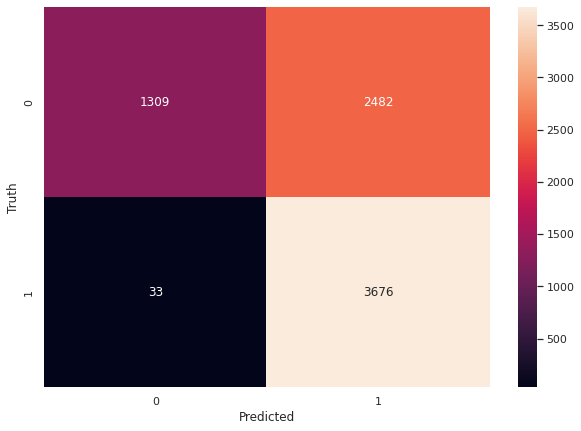

In [ ]:
cm_lstm1 = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_lstm1)
plt.figure(figsize = (10,7))
sns.heatmap(cm_lstm1, annot=True,fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

**Evaluation:**
- This model produces an overfitting on train
- As we can see from the lineplot chart, there is vanishing there where values tend to remain unchanged
- **The F1 score** obtained is 51 for the 0 (negative) label and the total accuracy is 0.66 (low)
- From the results of the classification report and confusiona matrix, the model tends to be wrong in predicting negative sentiment (where the model will predict it as positive sentiment)
- This is because the sentence patterns between positive and negative reviews have many words in common

### LSTM Improved

In [ ]:
history_lstm2_df = pd.DataFrame(model_ann2.history)

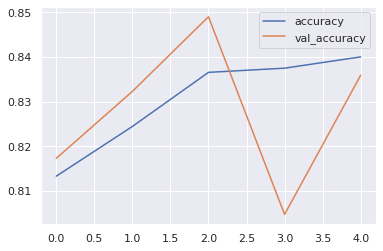

In [ ]:
history_lstm2_df[['accuracy', 'val_accuracy']].plot()

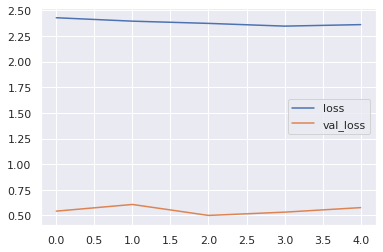

In [ ]:
history_lstm2_df[['loss', 'val_loss']].plot()

In [ ]:
y_pred_lstm2 = model3.predict(X_test)
y_pred_lstm2 = np.where(y_pred_lstm2 >=0.5, 1, 0)
print(classification_report(y_test, y_pred_lstm2))

235/235 [==============================] - 12s 35ms/step
              precision    recall  f1-score   support

           0       0.69      0.96      0.81      3791
           1       0.94      0.56      0.70      3709

    accuracy                           0.77      7500
   macro avg       0.81      0.76      0.75      7500
weighted avg       0.81      0.77      0.76      7500



Text(66.5, 0.5, 'Truth')

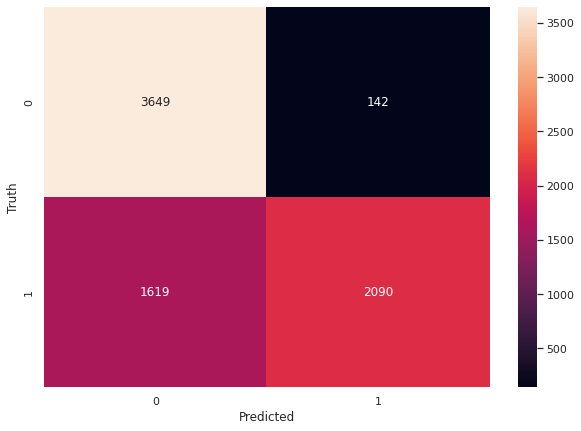

In [ ]:
cm_lstm2 = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_lstm2)
plt.figure(figsize = (10,7))
sns.heatmap(cm_lstm2, annot=True,fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

**Evaluation:**
- Because we added dropout regularization to the model, now the model tends to be wrong in predicting label 1 (positive)
- As we can see from the lineplot chart, there is vanishing in the loss and explode in the accuracy.
- **The F1 score obtained is 81 for the 0 (negative) label and the total accuracy is 0.77 (slighty better)**


## 8.3 - GRU

In [ ]:
history_gru_df = pd.DataFrame(model_ann3.history)

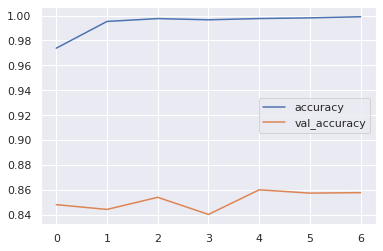

In [ ]:
history_gru_df[['accuracy', 'val_accuracy']].plot()

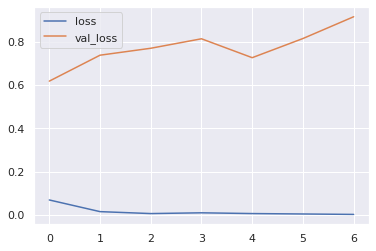

In [ ]:
history_gru_df[['loss', 'val_loss']].plot()

In [ ]:
y_pred_gru = model4.predict(X_test)
y_pred_gru = np.where(y_pred_gru >=0.5, 1, 0)
print(classification_report(y_test, y_pred_gru))

235/235 [==============================] - 7s 20ms/step
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      3791
           1       0.86      0.86      0.86      3709

    accuracy                           0.86      7500
   macro avg       0.86      0.86      0.86      7500
weighted avg       0.86      0.86      0.86      7500



Text(66.5, 0.5, 'Truth')

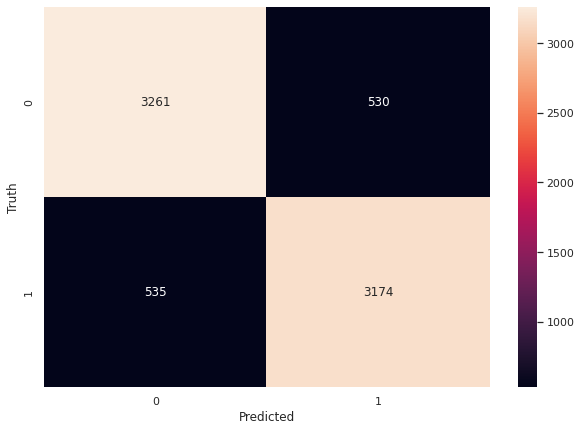

In [ ]:
cm_gru = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_gru)
plt.figure(figsize = (10,7))
sns.heatmap(cm_gru, annot=True,fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

**Evaluation:**
- the model with GRU still shows overfitting, where vanishing occurs on the graph plot accuracy and loss.
- However, the data test performed on this model obtained quite good results, namely the total accuracy F1 score of 0.86
- Errors in this model tend to be balanced between positive and negative sentiments

# 9 - Model Saving
Save the model that has been created to be later deployed and tested against data inference

In [ ]:
# Freeze Model
model4.trainable = False
model4.summary()

In [ ]:
#save ann model Functional API
model4.save('imdb_sentiment.h5')

## 9.1 - Inferencing


In [ ]:
from tensorflow.keras.models import load_model
model_ann = load_model('imdb_sentiment.h5')

In [ ]:
data_inf = ['I would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare. Forget pretty pictures painted for mainstream audiences']

In [ ]:
y_pred_inf = model_ann.predict(data_inf)
y_pred_inf = np.where(y_pred_inf >= 0.5, 1, 0)
y_pred_inf

# 10 - Overall Analysis (Conclution)

## EDA
- Positive and negative sentiment data are balance distributed
- `Positive sentiment` tends to have a `longer text` than reviews that have negative sentiment
- HTML tags (`<br>`) appear more frequently bot in sentiment negative and positive
- The words film, movie, one, time etc. seem to have quite a lot of frequency

## Preprocessing
- Use the BeautifulSoup library, every `html tag` will be `removed` in the document and only the `text elements will be returned`
- Other preprocessing we used to replace the chatword, abbreviation, lowercase, remove punctuation and remove stopwords
- Based on the case we are dealing with is in sentiment analysis, then every word context will be important **So we choose the lemma for this case**

## Model Definition & Training
- The model used is **Artificial Neural Network, with Sequential**
- We conducted experiments with the `usual model, LSTM, and GRU`. from the results obtained the model still tends to be overfitting
- From the results of the classification report and confusiona matrix, the model tends to be wrong in predicting negative sentiment (where the model will predict it as positive sentiment) This is because the sentence patterns between positive and negative reviews have many words in common
- Because we added dropout regularization to the model, now the model tends to be wrong in predicting label 1 (positive) but on LSTM Improvement **The F1 score obtained is 81 for the 0 (negative), and 70 for the 1 (positive) label. the total accuracy is 0.77 (slighty better)**
- the model with GRU still shows overfitting, However, the data test performed on this model obtained quite good results, namely the total accuracy **F1 score of 0.86**
- LSTM models that have been improved and GRU produce good performance to be selected in the deployment, but we still cannot say that this model is better than the others. need to be retested for improvement